In [1]:
documents = [
    "I love playing cricket and football",
    "The match was exciting and the team won",
    "Exams are approaching and syllabus is vast",
    "Students are preparing for exams and tests",
    "Football team played a great match",
    "Syllabus and exams are important for students"
]


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    stop_words='english'
)

X = vectorizer.fit_transform(documents)


In [3]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(
    n_components=2,        # number of topics
    random_state=42
)

lda.fit(X)


LatentDirichletAllocation(n_components=2, random_state=42)

In [4]:
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"\nTopic {topic_idx + 1}:")
    top_words = topic.argsort()[-6:]
    for i in top_words:
        print(feature_names[i], end=" ")



Topic 1:
exciting played great football team match 
Topic 2:
preparing tests important syllabus students exams 

In [5]:
doc_topics = lda.transform(X)

for i, probs in enumerate(doc_topics):
    print(f"Document {i+1} topic probabilities: {probs}")


Document 1 topic probabilities: [0.89603425 0.10396575]
Document 2 topic probabilities: [0.89663983 0.10336017]
Document 3 topic probabilities: [0.10284779 0.89715221]
Document 4 topic probabilities: [0.10284779 0.89715221]
Document 5 topic probabilities: [0.91407001 0.08592999]
Document 6 topic probabilities: [0.1023322 0.8976678]


In [14]:
# Convert to lowercase
text = " ".join(documents).lower()

# Remove punctuation
import string
text = text.translate(str.maketrans('', '', string.punctuation))


In [15]:
words = text.split()
print(words)


['i', 'love', 'playing', 'cricket', 'and', 'football', 'the', 'match', 'was', 'exciting', 'and', 'the', 'team', 'won', 'exams', 'are', 'approaching', 'and', 'syllabus', 'is', 'vast', 'students', 'are', 'preparing', 'for', 'exams', 'and', 'tests', 'football', 'team', 'played', 'a', 'great', 'match', 'syllabus', 'and', 'exams', 'are', 'important', 'for', 'students']


In [16]:
from collections import Counter

word_freq = Counter(words)
print(word_freq)


Counter({'and': 5, 'exams': 3, 'are': 3, 'football': 2, 'the': 2, 'match': 2, 'team': 2, 'syllabus': 2, 'students': 2, 'for': 2, 'i': 1, 'love': 1, 'playing': 1, 'cricket': 1, 'was': 1, 'exciting': 1, 'won': 1, 'approaching': 1, 'is': 1, 'vast': 1, 'preparing': 1, 'tests': 1, 'played': 1, 'a': 1, 'great': 1, 'important': 1})


In [17]:
words = list(word_freq.keys())
frequencies = list(word_freq.values())


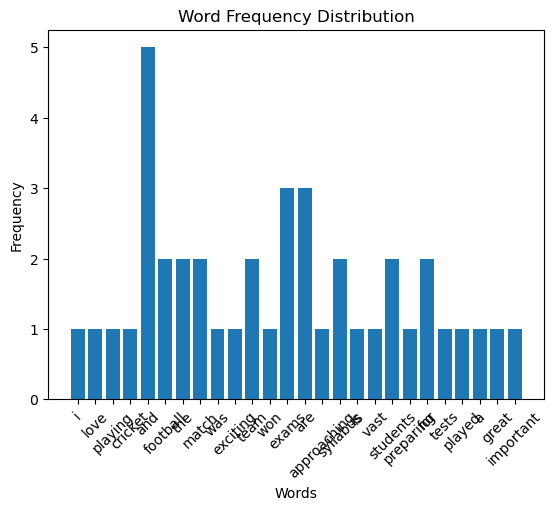

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(words, frequencies)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.xticks(rotation=45)
plt.show()


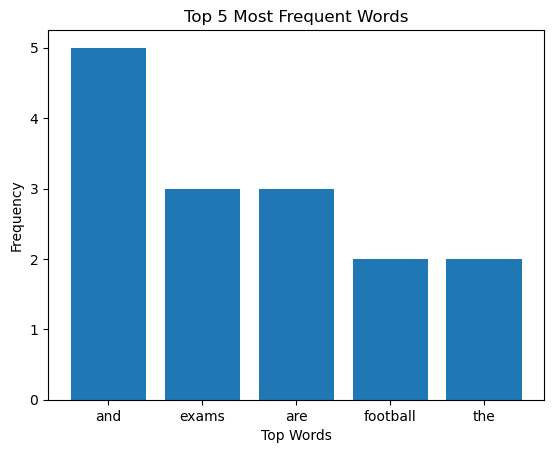

In [19]:
top_words = word_freq.most_common(5)

words = [word for word, freq in top_words]
frequencies = [freq for word, freq in top_words]

plt.figure()
plt.bar(words, frequencies)
plt.xlabel("Top Words")
plt.ylabel("Frequency")
plt.title("Top 5 Most Frequent Words")
plt.show()


In [6]:
text = """
students love machine learning
machine learning is useful
students learn machine learning in college
learning machine concepts helps students
"""
